In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 151s 1us/step


In [4]:
train_images

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
train_images, test_images = train_images/255, test_images/255

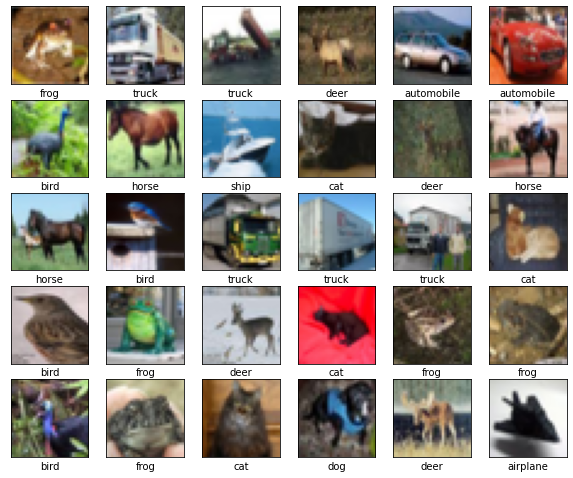

In [19]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
#plt.imshow(train_images[8])
for i in range(30):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()



In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))


In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 4096)             

In [46]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
#model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 4096)             

In [57]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 90s 56ms/step - loss: 0.2839 - accuracy: 0.8991 - val_loss: 1.0978 - val_accuracy: 0.7162
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.2415 - accuracy: 0.9145 - val_loss: 1.2356 - val_accuracy: 0.7021
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.2095 - accuracy: 0.9246 - val_loss: 1.3006 - val_accuracy: 0.7174
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.1969 - accuracy: 0.9308 - val_loss: 1.3981 - val_accuracy: 0.7099
Epoch 5/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.1722 - accuracy: 0.9375 - val_loss: 1.4595 - val_accuracy: 0.6990
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.1591 - accuracy: 0.9434 - val_loss: 1.5444 - val_accuracy: 0.7094
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.1489 - accuracy: 0.9468 - val_loss: 1.6901 -

313/313 - 2s - loss: 1.8432 - accuracy: 0.7043 - 2s/epoch - 7ms/step


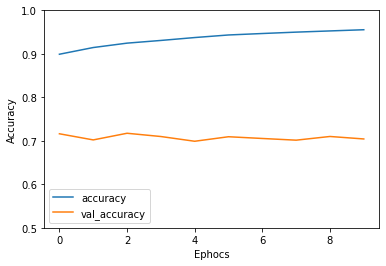

In [58]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Ephocs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend()
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


In [64]:
model.predict(train_images)

1563/1563 [==============================] - 12s 7ms/step


array([[3.3617792e-10, 2.8536153e-11, 1.0378320e-02, ..., 7.3961135e-05,
        3.4872298e-12, 2.6017184e-14],
       [1.9304451e-08, 4.7862552e-05, 2.8307714e-09, ..., 1.6632715e-16,
        2.2762884e-14, 9.9995208e-01],
       [6.1794581e-10, 1.2661491e-13, 4.8047344e-10, ..., 4.9385870e-13,
        2.4156629e-14, 1.0000000e+00],
       ...,
       [1.4061468e-05, 6.7591117e-08, 4.4025220e-10, ..., 2.2245148e-11,
        1.4199031e-08, 9.9998581e-01],
       [6.2568944e-13, 1.0000000e+00, 3.3709401e-21, ..., 7.5496207e-27,
        1.2637237e-14, 1.3221037e-08],
       [9.5985968e-05, 9.9949360e-01, 7.2091084e-06, ..., 2.5179339e-10,
        1.0167103e-05, 3.1943369e-04]], dtype=float32)

In [65]:
print(test_acc)

0.7042999863624573
